In [1]:
library('purrr')
library('tidyverse')

theme_set(theme_gray(base_size = 18))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [22]:
fair_coin_toss = function(n_tosses) {
    
    result = ifelse(runif(n = n_tosses) > 0.5, 'heads', 'tails')
    
    n_heads_df = data.frame(result = factor(result, levels = c('heads', 'tails'))) |>
        count(result) |>
        filter(result == 'heads') |>
        mutate(prop_heads = n / n_tosses)
    
    return(n_heads_df)
    
}

fair_coin_toss(n_tosses = 250)

result,n,prop_heads
<fct>,<int>,<dbl>
heads,127,0.508


In [23]:
get_samples = function(n_samples, sample_size) {
    map_df(1:n_samples, ~ fair_coin_toss(sample_size), .id = 'sample_id') |>
        mutate(n_samples = n_samples, sample_size = sample_size)
}

get_samples(n_samples = 10, sample_size = 250)

sample_id,result,n,prop_heads,n_samples,sample_size
<chr>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,heads,127,0.508,10,250
2,heads,132,0.528,10,250
3,heads,126,0.504,10,250
4,heads,133,0.532,10,250
5,heads,118,0.472,10,250
6,heads,118,0.472,10,250
7,heads,124,0.496,10,250
8,heads,126,0.504,10,250
9,heads,122,0.488,10,250


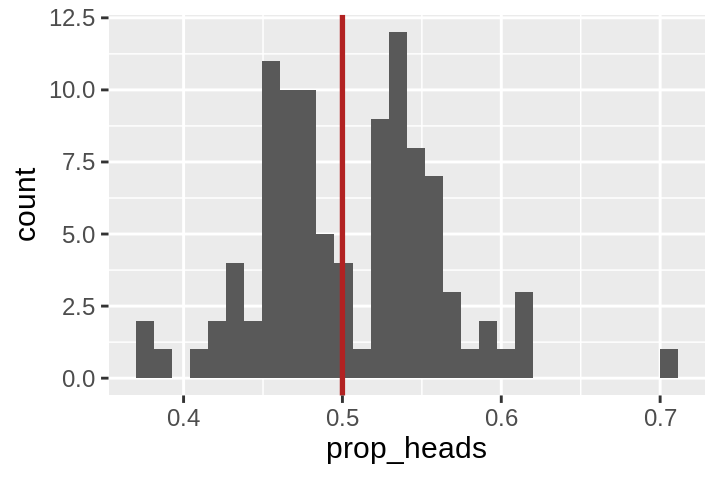

In [24]:
options(repr.plot.height = 4, repr.plot.width = 6)

sample_size = 100
n_samples = 100
samples = get_samples(n_samples, sample_size)

p = ggplot(samples, aes(x = prop_heads)) +
    geom_histogram(bins = 30) +
    geom_vline(xintercept = 0.5, color = 'firebrick', linewidth = 1.5)

p

In [25]:
sample_size = c(250, 1500, 7500)
n_samples = rep(200, length(sample_size))

n_samples

[1] 200 200 200

In [26]:
sample_size

[1]  250 1500 7500

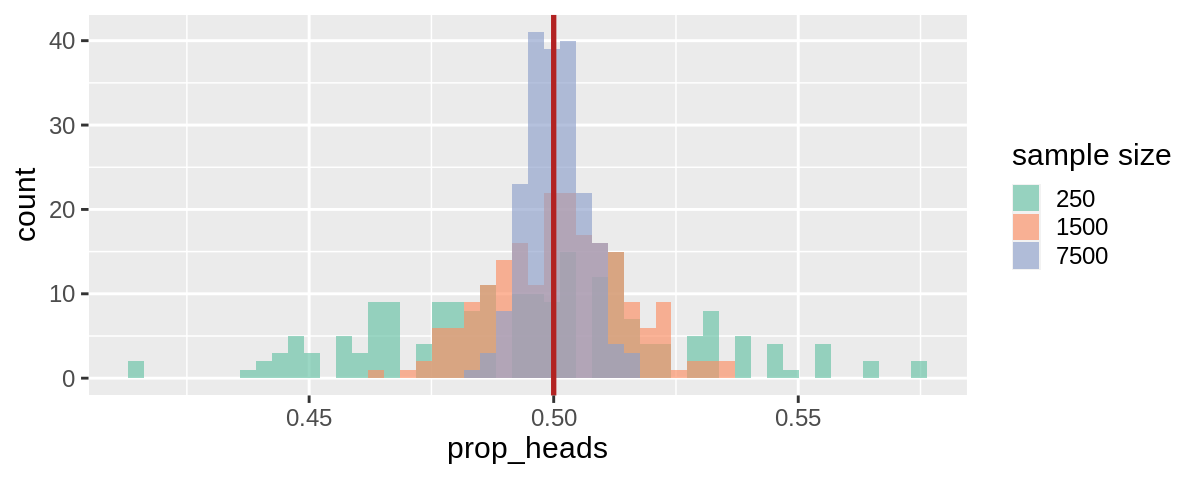

In [27]:
sample_size = c(250, 1500, 7500)
n_samples = rep(200, length(sample_size))

virtual_samples_df = map2_df(n_samples, sample_size, get_samples)

options(repr.plot.height = 4, repr.plot.width = 10)

p = ggplot(virtual_samples_df, aes(x = prop_heads, fill = factor(sample_size))) +
    geom_histogram(bins = 50, alpha = 0.65, position = 'identity') +
    geom_vline(xintercept = 0.5, color = 'firebrick', linewidth = 1.5) +
    labs(fill = 'sample size') +
    scale_fill_brewer(palette = 'Set2')

p